# Image preproccessing

This code can take in a image that has grid items in it and crop all the induvidual grids out. It also incorparates canny edge detection to make to images black and white only

In [47]:
#importing the useful libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Example of Edge detection

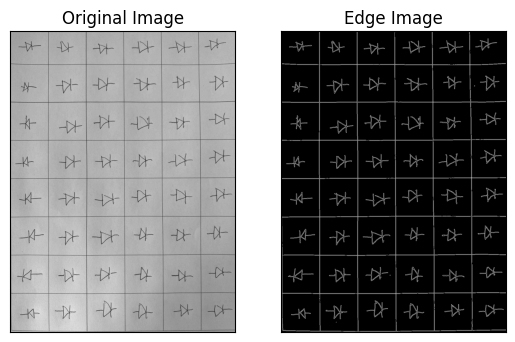

In [48]:
#img = cv.imread('TestImagesResistors.jpeg', cv.IMREAD_GRAYSCALE)
img = cv.imread("TestForCapasitors.jpeg", cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges1 = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges1,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

# Cropping the Images

This will take the grid and make it into induvidaul images that only have one item in it. It does this by finding the shape of the image, dividing it by the number of cells to find the size of each block, finding the middle of each block and cropping out a square that will have the image in it. It will then return a list of matrixies with each index in the list corrosponding to an item in the array. It goes from left to right and then once it reaches the end of the columns goes down a row

In [49]:
#Takes in filtered images and converts them to an array of cropped images
def cropImage(img,List):
    [hight,width] = img.shape #getting the shape to 
    indexh = int((hight/8))
    indexw = int((width/6))
    offset = 50 # This is the only values that might need tuning for different cameras
    Resistors = [] #making an empty list

    h = np.linspace(1,8,8,dtype=int) # making an array from 1 to 8 these are the rows
    w = np.linspace(1,6,6,dtype=int) # making an array from 1 to 6 these are the columns 
    for y in h:
        for x in w:
            middleY = int(indexh*y - indexh/2) # finding the middle of the block
            middleX = int(indexw*x - indexw/2)
            crop_image = img[middleY-offset:middleY+offset, middleX-offset:middleX+offset] #cropping a square inside the block
            #outfile = "Test"+ str(y) + "_" + str(x)+ ".jpg" #formatting the filename
            #cv.imwrite(outfile, crop_image) # don't need to actually save the image as a file, but for testing its nice
            List.append(crop_image) #adding the list to the array
    return List

# Getting all the data

The make list function will take in a name of the base name of the file - for example you have 10 images of the resistors. They should be named something along the lines of R_0 ,R_1 ... R_9. To get the data from all these files you can call the function with the base name of the file, in this example R will be the base name, and the number of items ie 10. It will then read in the images one by one and add them all to a single list. So if you have 2 files each with 8*6 = 48 items, you will get a list with 96 items in it

In [57]:
def makeList(fileBaseName, nFiles): 
    List = []
    for i in range(nFiles):
        FileName = fileBaseName+ "_" +str(i)+".jpeg"
        print(FileName)
        img = cv.imread(FileName)
        assert img is not None, "file could not be read, check with os.path.exists()"
        edges = cv.Canny(img,100,200)
        List.append(cropImage(edges,List)) 
    return List

# Code for Testing The images

In [ ]:
def loop_plot(Resistors):
    figs={}
    axs={}
    for idx in range(len(Resistors)):
        ResistorsUncolored = cv.cvtColor(Resistors[idx], cv.COLOR_BGR2RGB)
        figs[idx]=plt.figure()
        axs[idx]=figs[idx].add_subplot(111)
        plt.subplot(),plt.imshow(ResistorsUncolored)
    return figs, axs  

# Testing the Resistors List

R_0.jpeg
R_1.jpeg


C:\Users\tlgwo\AppData\Local\Temp\ipykernel_10832\3436953488.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figs[idx]=plt.figure()


<Figure size 640x480 with 0 Axes>

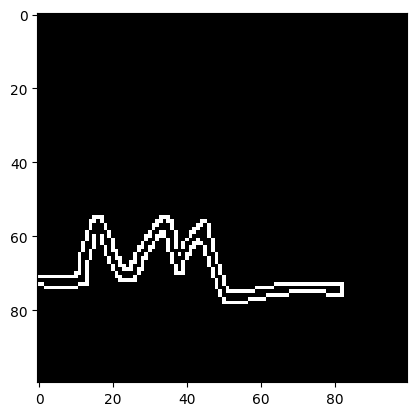

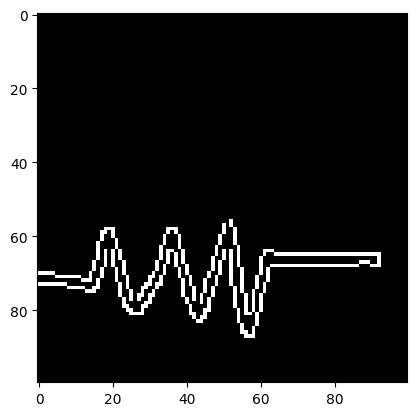

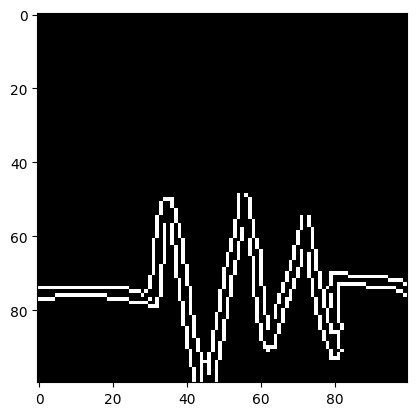

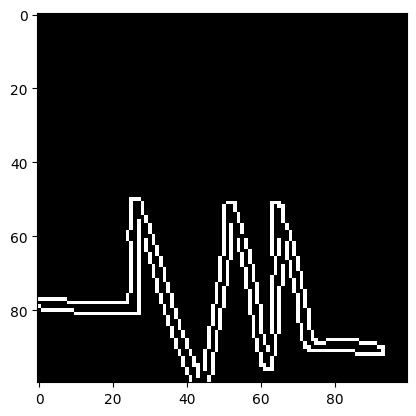

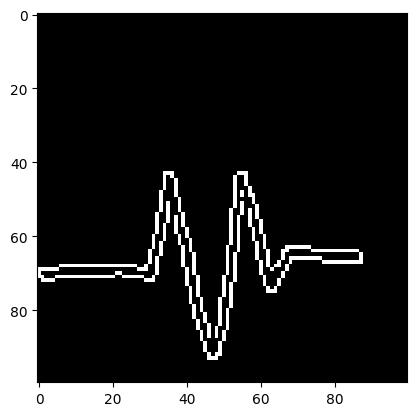

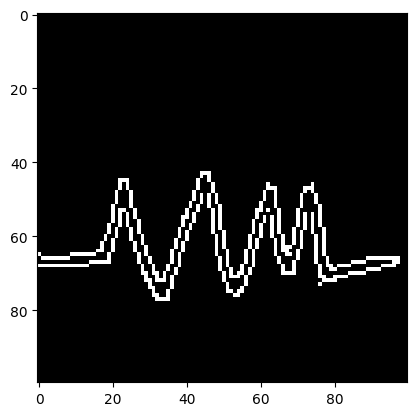

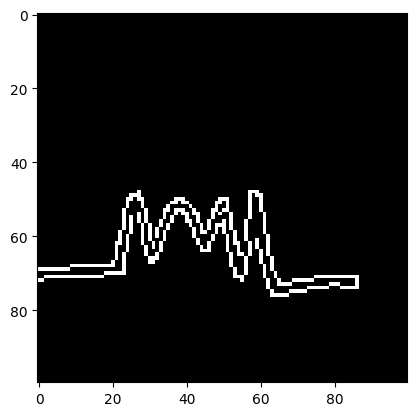

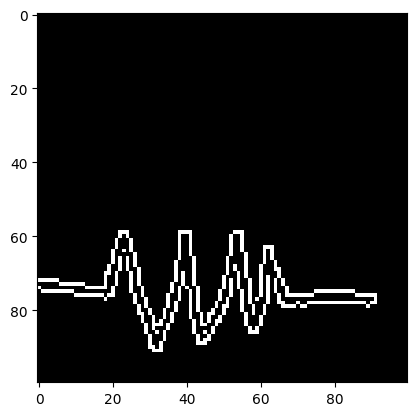

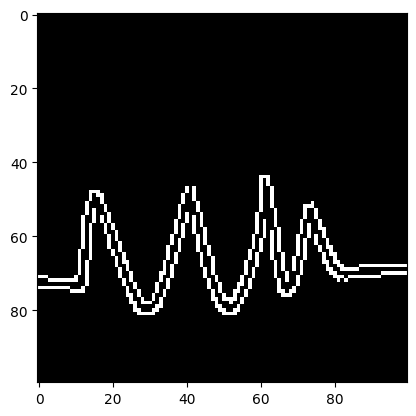

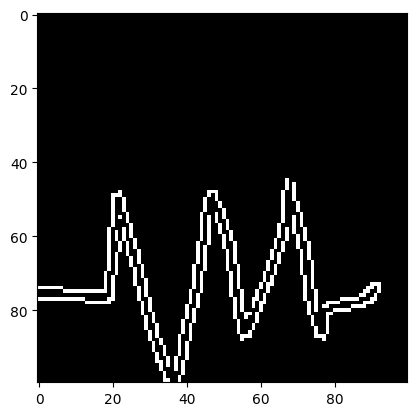

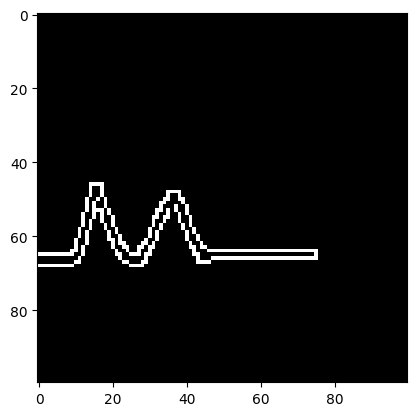

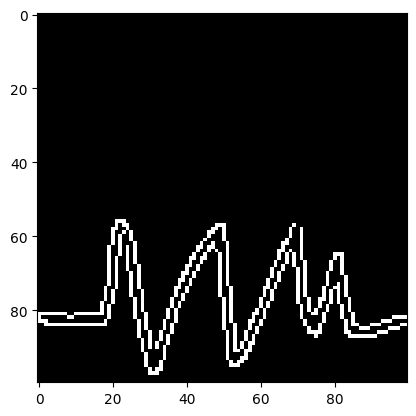

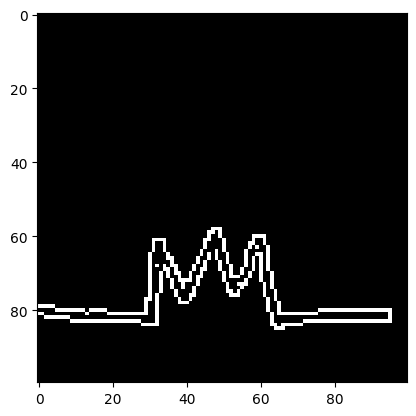

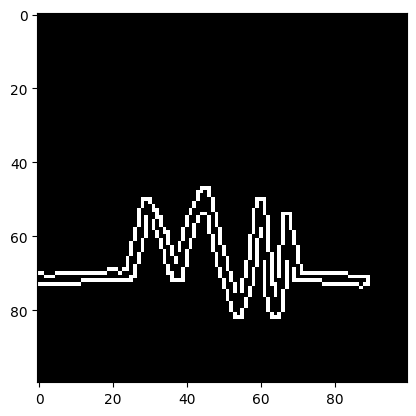

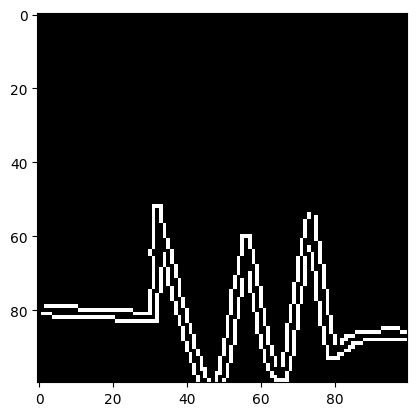

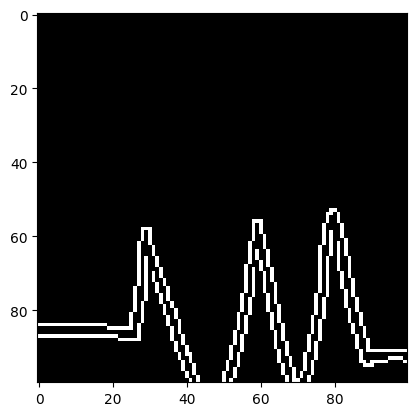

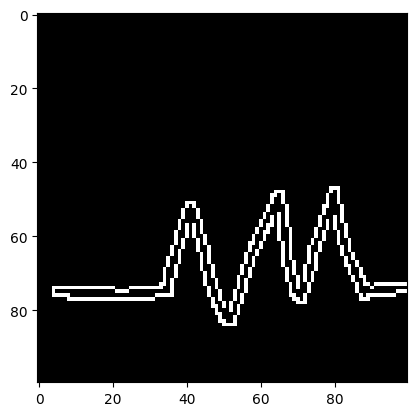

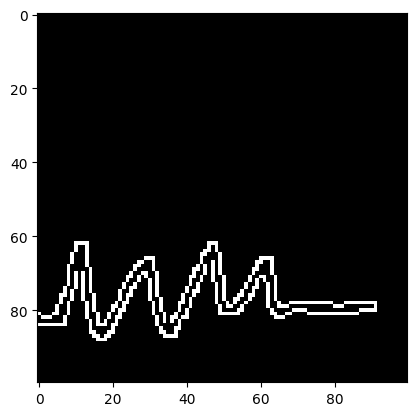

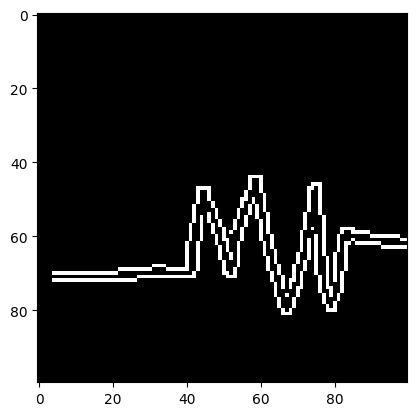

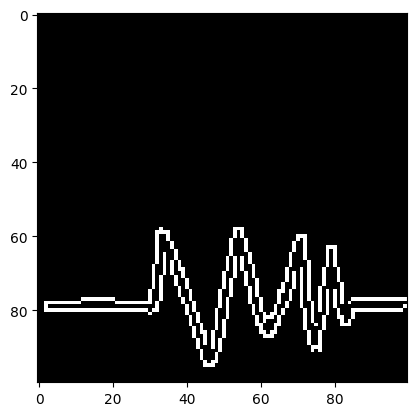

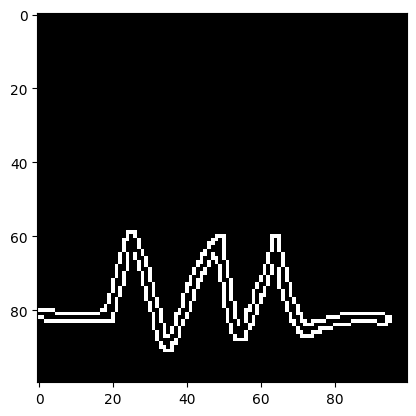

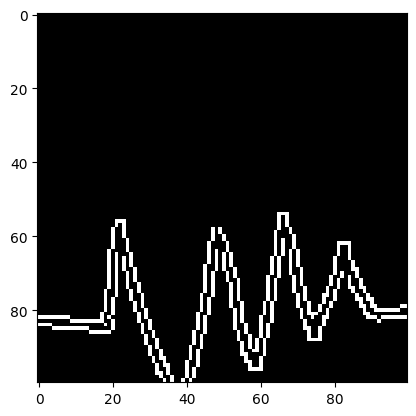

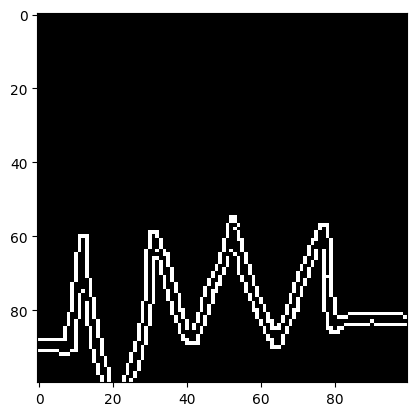

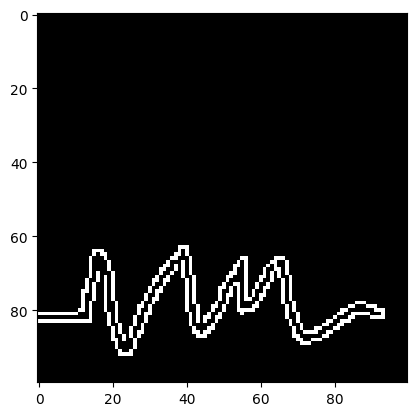

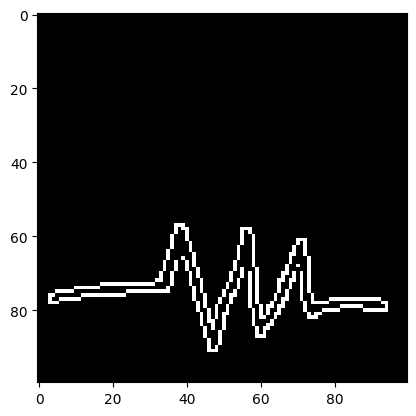

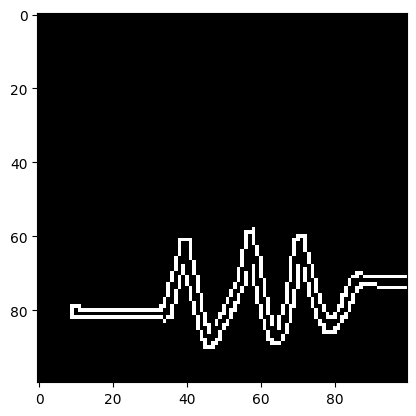

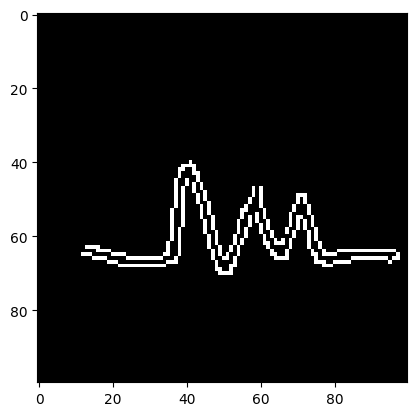

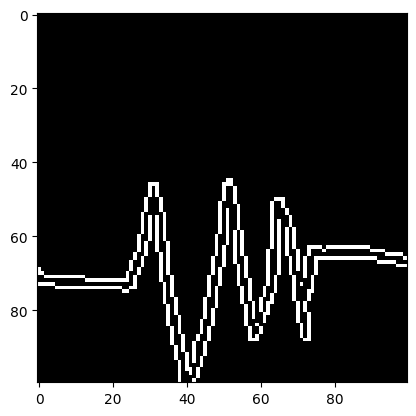

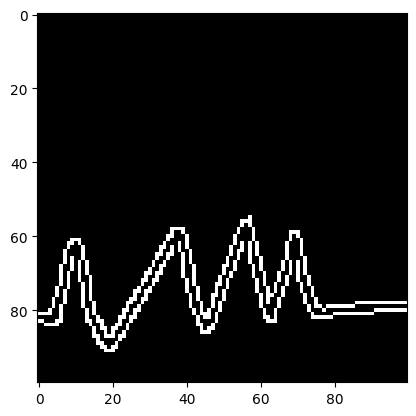

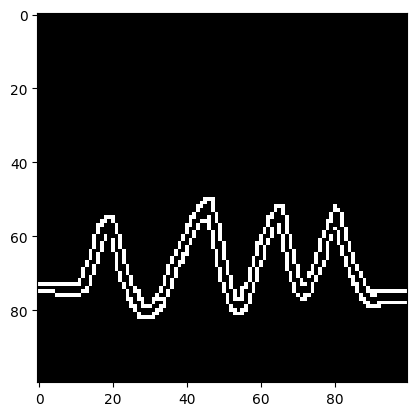

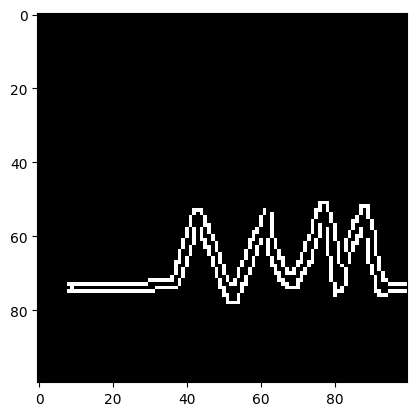

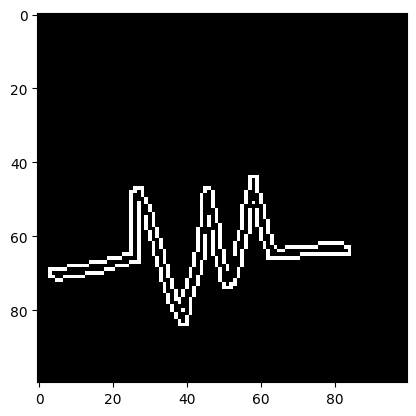

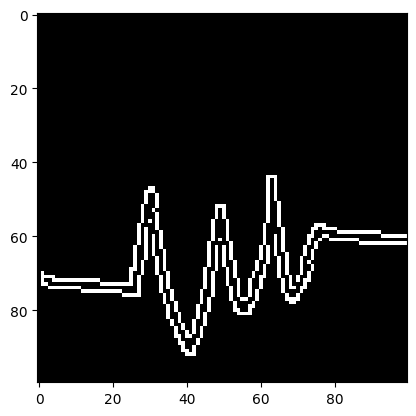

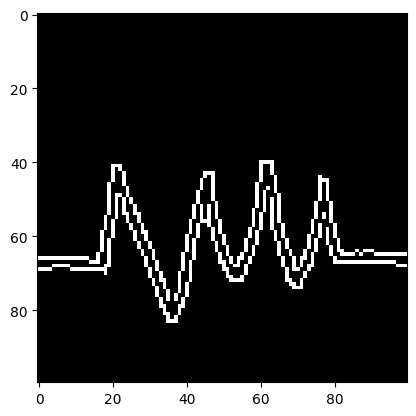

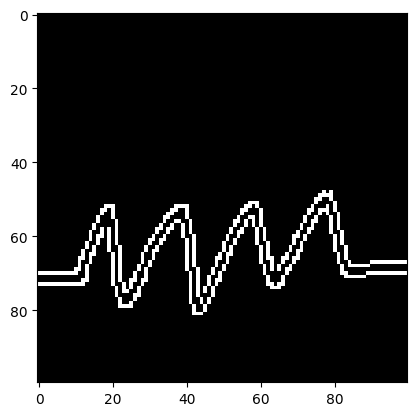

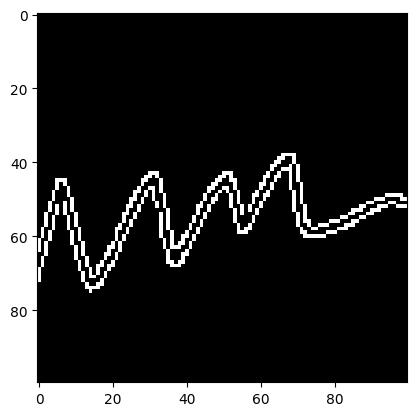

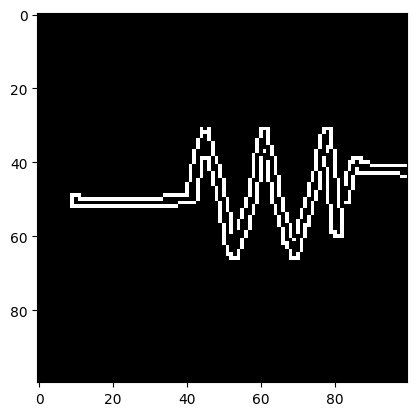

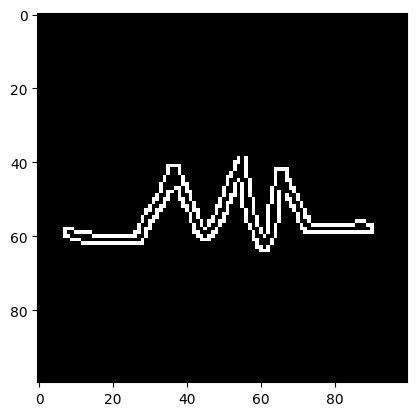

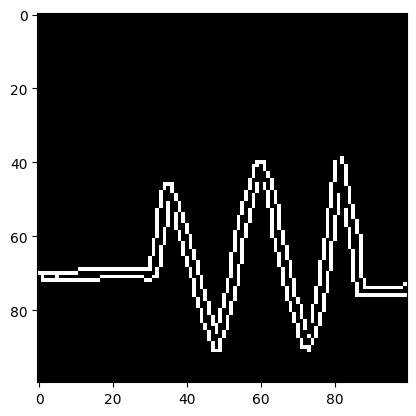

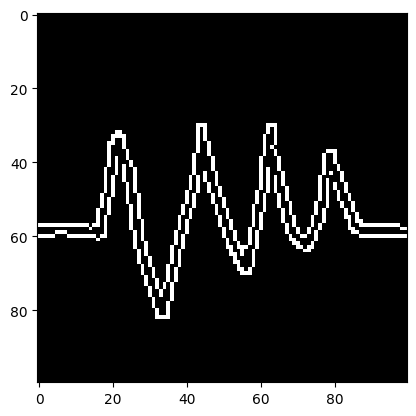

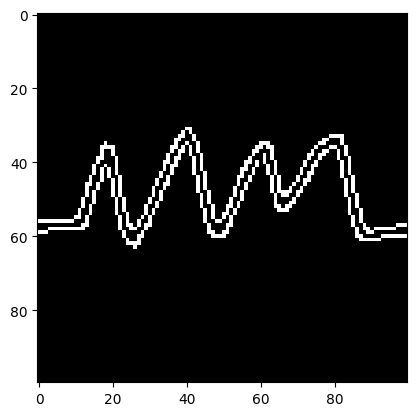

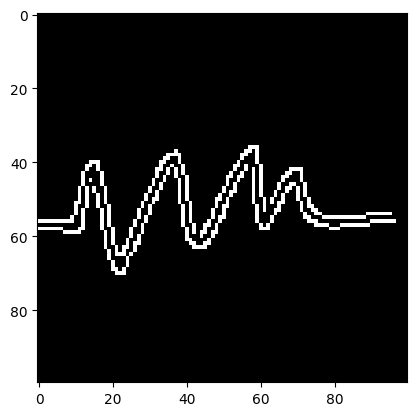

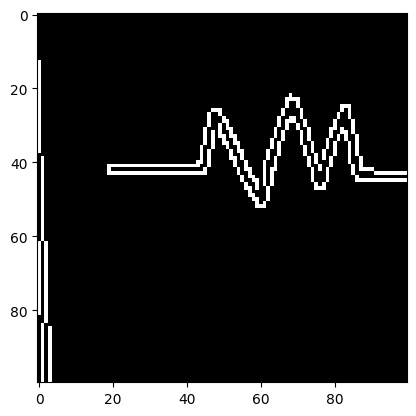

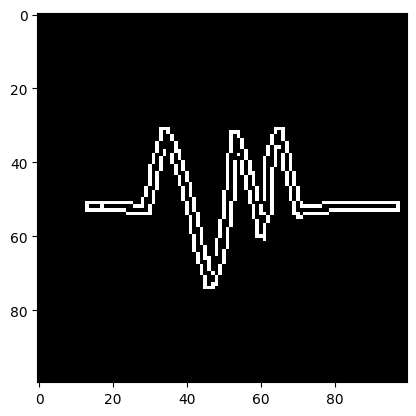

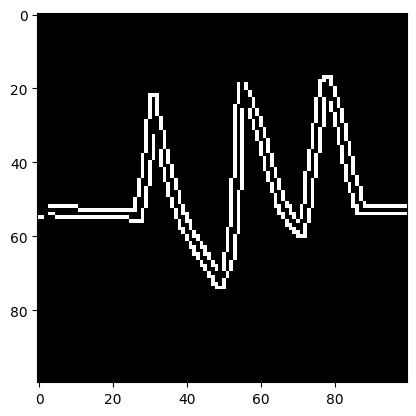

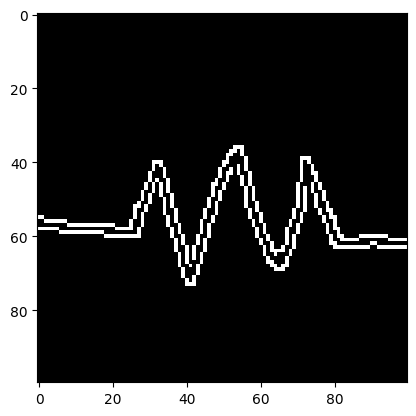

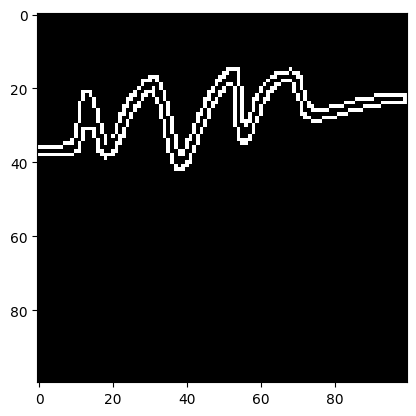

In [67]:
resistors = []
resistors = makeList("R",2)
plt.figure()
#figs, axs = loop_plot(Resistors) uncomment this to check all the items
